In [1]:
import sys
import time
import random
import math
import os
import numpy as np
import multiprocessing as mp

Python has a built-in process-based library for concurrent computing, called [multiprocessing](https://docs.python.org/3/library/multiprocessing.html). The multiprocessing package is very useful for highly parallel tasks that do not need to communicate with each other, other than when sending the initial data to the pool of processes and when and collecting the results.

In [3]:
nprocs = mp.cpu_count()
print(f"Number of CPU cores: {nprocs}")

Number of CPU cores: 2


In [4]:
!top -n 1

=top - 23:47:17 up 2 min,  0 users,  load average: 0.55, 0.40, 0.16
Tasks:  11 total,   1 running,   9 sleeping,   0 stopped,   1 zombie
%Cpu(s): 20.3 us,  7.3 sy,  0.0 ni, 69.0 id,  3.2 wa,  0.0 hi,  0.2 si,  0.0 st
KiB Mem : 13302920 total, 10708772 free,   719400 used,  1874748 buff/cache
KiB Swap:        0 total,        0 free,        0 used. 12363024 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND   
     42 root      20   0  201416  60160  15304 S   6.7  0.5   0:01.58 jupyter-+ 
      1 root      20   0     992      4      0 S   0.0  0.0   0:00.55 docker-i+ 
      7 root      20   0  339816  49952  32292 S   0.0  0.4   0:00.85 node      
     18 root      20   0   35892   4780   3668 S   0.0  0.0   0:00.53 tail      
     28 root      20   0       0      0      0 Z   0.0  0.0   0:05.71 python3   
     29 root      20   0  157740  40664  12624 S   0.0  0.3   0:00.48 colab-fi+ 
     43 root      20   0  707084   5292   4160 S   0.0  0.0   

# Example 1: Basic Concepts

In [15]:
def useless_function(sec = 1):
  pid = os.getpid()
  print(f'Process {os.getpid()} (Parent process = {os.getppid()}) will sleep for {sec} second(s)')
  time.sleep(sec)
  print(f'Done sleeping')

In [16]:
print('Process id:', os.getpid())
start = time.perf_counter()
useless_function()
useless_function()
end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} second(s)') 

Process id: 60
Process 60 (Parent process = 42) will sleep for 1 second(s)
Done sleeping
Process 60 (Parent process = 42) will sleep for 1 second(s)
Done sleeping
Finished in 2.0 second(s)


In [17]:
print('Process id:', os.getpid())
start = time.perf_counter()
process1 = mp.Process(target=useless_function)
process2 = mp.Process(target=useless_function)
process1.start()
process2.start()
end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} second(s)') 

Process id: 60
Process 420 (Parent process = 60) will sleep for 1 second(s)
Finished in 0.02 second(s)
Process 423 (Parent process = 60) will sleep for 1 second(s)


In [18]:
print('Process id:', os.getpid())
start = time.perf_counter()
process1 = mp.Process(target=useless_function)
process2 = mp.Process(target=useless_function)
process1.start()
process2.start()
process1.join()
process2.join()
end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} second(s)') 

Process id: 60
Process 430 (Parent process = 60) will sleep for 1 second(s)
Process 433 (Parent process = 60) will sleep for 1 second(s)
Done sleeping
Done sleeping
Finished in 1.04 second(s)


In [28]:
def u_function(sec = 1):
  pid = os.getpid()
  print(f'Process {os.getpid()} (Parent process = {os.getppid()}) will sleep for {sec} second(s)')
  time.sleep(sec)
  print(f'Done sleeping')

print('Process id:', os.getpid())
start = time.perf_counter()
processes = []
for _ in range(10):
  p = mp.Process(target=u_function, args = [1])
  p.start()
  print('p.pid :', p.pid)
  processes.append(p) 

for p in processes:
  p.join()

mp.Queue

end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} second(s)')  

Process id: 60
p.pid : 765
Process 765 (Parent process = 60) will sleep for 1 second(s)
p.pid : 768
p.pid : 770
Process 768 (Parent process = 60) will sleep for 1 second(s)
p.pid : 774
Process 770 (Parent process = 60) will sleep for 1 second(s)
p.pid : 777
Process 774 (Parent process = 60) will sleep for 1 second(s)
Process 777 (Parent process = 60) will sleep for 1 second(s)
p.pid : 780
Process 780 (Parent process = 60) will sleep for 1 second(s)
p.pid : 783
Process 783 (Parent process = 60) will sleep for 1 second(s)
p.pid : 786
Process 786 (Parent process = 60) will sleep for 1 second(s)
p.pid : 789
Process 789 (Parent process = 60) will sleep for 1 second(s)
Process 790 (Parent process = 60) will sleep for 1 second(s)
p.pid : 790
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Finished in 1.18 second(s)


# Example 2: Performance Comparison

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

def random_square(seed):
    np.random.seed(seed)
    random_num = np.random.randint(0, 10)
    return random_num**2
    
def serial(n):
    t0 = time.time()
    results = []
    for i in range(n): 
        results.append(random_square(i))
    t1 = time.time()
    exec_time = t1 - t0
    return exec_time

def parallel(n):
    t0 = time.time()
    n_cpu = mp.cpu_count()

    pool = mp.Pool(processes=n_cpu)
    results = [pool.map(random_square, range(n))]
    t1 = time.time()
    exec_time = t1 - t0
    return exec_time

In [22]:
n_run = np.logspace(1, 7, num = 7)

t_serial = [serial(int(n)) for n in n_run]
t_parallel = [parallel(int(n)) for n in n_run]

KeyboardInterrupt: ignored

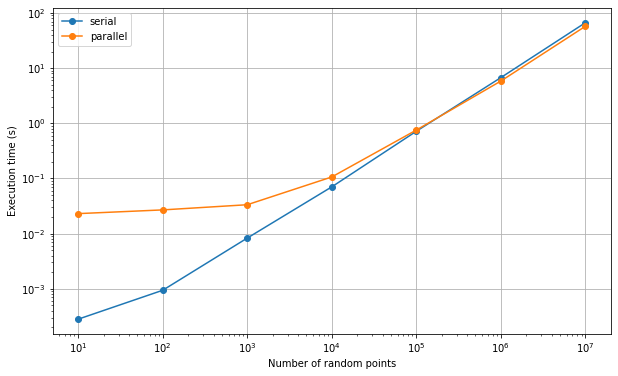

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(n_run, t_serial, '-o', label = 'serial')
plt.plot(n_run, t_parallel, '-o', label = 'parallel')
plt.loglog()
plt.legend()
plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')
plt.grid()
plt.show()

# Example 3: Performance Comparison

In [ ]:
SAMPLE_BATCH_SIZE = 100000

def sample(num_samples):
    num_inside = 0
    for _ in range(num_samples):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        if math.hypot(x, y) <= 1:
            num_inside += 1
    return num_inside

def approximate_pi(num_samples):
    start = time.time()
    num_inside = sample(num_samples)
    print(num_samples, ' samples')
    print("pi ~= {}".format((4*num_inside)/num_samples))
    print("Finished in: {:.2f}s".format(time.time()-start))

def approximate_pi_parallel(num_samples):
    # In practice it is desirable to have one process per CPU core, 
    # so it is a good idea to set nprocs to be the number of available CPU cores. 
    processes = 4
    pool = mp.Pool(processes=processes)

    start = time.time()
    num_inside = 0
    for result in pool.map(sample, [SAMPLE_BATCH_SIZE for _ in range(num_samples//SAMPLE_BATCH_SIZE)]):
        num_inside += result

    print(num_samples, ' samples')
    print("pi ~= {}".format((4*num_inside)/num_samples))
    print("Finished in: {:.2f}s".format(time.time()-start))

In [ ]:
num_samples = 1_000_000

In [ ]:
approximate_pi(num_samples)

1000000  samples
pi ~= 3.14164
Finished in: 0.98s


In [ ]:
approximate_pi_parallel(num_samples)

1000000  samples
pi ~= 3.140616
Finished in: 0.98s
